 # MODEL TRAINING

## 1.1 Importing data and Required Packages

In [14]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tabulate import tabulate
# Modelling
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 217.9 kB/s eta 0:00:01
     ---------------- --------------------- 20.5/47.0 kB 217.9 kB/s eta 0:00:01
     ------------------------ ------------- 30.7/47.0 kB 146.3 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/47.0 kB 151.3 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 147.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.1/101.0 MB 656.4 kB/s eta 0:02:34
   ---------------------------------------- 0.1/101.0 MB 1.0 MB/s eta 0:01:38
   ---------------------------------------- 0.2/101.0 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.3/101.0 MB 1.3 MB/s eta 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'd:\\mlproject\\venv\\Lib\\site-packages\\catboost\\_catboost.pyd'
Consider using the `--user` option or check the permissions.



## 1.2 Preparing X and Y variables

In [7]:
X = df.drop(columns=['math score'],axis=1)
y = df['math score']

## 1.3 Pre-processing

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

## 1.4 Split Data

In [12]:
# Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# 2. Training & Evaluation

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
import pandas as pd
from tabulate import tabulate
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a list to store results
results_list = []

# Model dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Model evaluation loop
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Append results to the list
    results_list.append({
        'Model': model_name,
        'Train_RMSE': model_train_rmse,
        'Train_MAE': model_train_mae,
        'Train_R2': model_train_r2,
        'Test_RMSE': model_test_rmse,
        'Test_MAE': model_test_mae,
        'Test_R2': model_test_r2
    })

# Convert the list to a DataFrame
results_df = pd.DataFrame(results_list)

# Display results as a table
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


+-------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|          Model          |     Train_RMSE     |     Train_MAE      |      Train_R2      |     Test_RMSE      |      Test_MAE      |      Test_R2       |
+-------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    Linear Regression    | 5.325499939172572  |   4.26845703125    | 0.8742015264255842 | 5.4008924965290435 |   4.218388671875   | 0.8801272640936912 |
|          Lasso          | 6.593815587795565  | 5.206302661246526  | 0.8071462015863458 | 6.519694535667419  | 5.157881810347763  | 0.8253197323627853 |
|          Ridge          | 5.323324922741654  |  4.26498782372598  | 0.8743042615212909 | 5.390387016935634  | 4.211100688014257  | 0.8805931485028741 |
|  K-Neighbors Regressor  | 5.709264400953944  |       4.5175       | 0.8554

The best model is Linnear Regression

# 3. Plotting

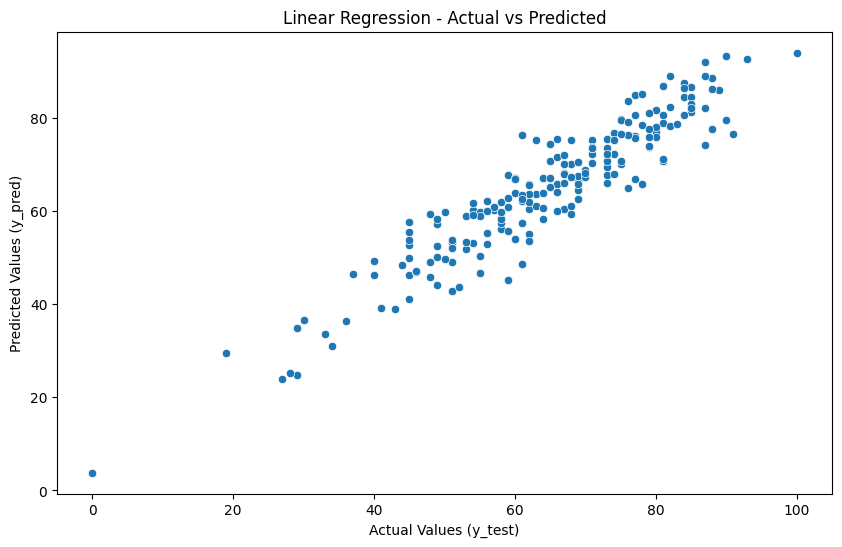

In [20]:
# Choose a model (replace 'Linear Regression' with the desired model)
selected_model_name = 'Linear Regression'
selected_model = models[selected_model_name]

# Fit the selected model
selected_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = selected_model.predict(X_test)

# Scatter plot for y_test vs y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title(f'{selected_model_name} - Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()

<Axes: xlabel='math score'>

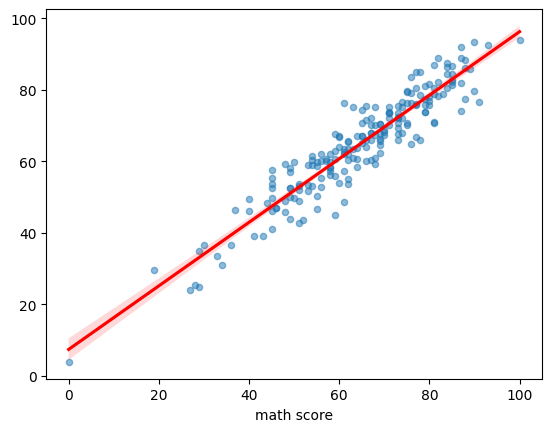

In [21]:
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})

## Difference between Actual and Predicted Values

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.513672,14.486328
737,53,58.976562,-5.976562
740,80,76.884766,3.115234
660,74,76.710938,-2.710938
411,84,87.521484,-3.521484
...,...,...,...
408,52,43.564453,8.435547
332,62,61.994141,0.005859
208,74,68.009766,5.990234
613,65,67.134766,-2.134766
